
 ¿Qué es el Aprendizaje de Máquinas?
====

Ejemplos complementarios a la presentación **¿Qué es el Aprendizaje de Máquinas?
### Preliminares


Todos los ejemplos requieren **numpy** y **matplotlib** y fueron desarrollados bajo Python3.
La mejor manera de instalarlos es mediante **pip**

*% pip install numpy*

*% pip install matplotlib*

Además se necesita

<img src="imgs/scikit.png" alt="Scikit-Learn" style="width: 600px;">

Scikit-learn es una librería de machine learning para Python. Posee algoritmos para clasificación, regresión, clustering, entre otras herramientas. Es software gratuito 

*% pip install scikit-learn*


[https://scikit-learn.org](https://scikit-learn.org)


<img src="imgs/pytorch.png" alt="PyTorch" style="width: 600px;">

PyTorch es una librería de machine learning orientada a aplicaciones de visión de computadora y procesamiento de lenguaje natural. Puede ejecutar los algoritmos en una arquitectura paralela si hay disponible un procesador gráfico compatible con CUDA (no es necesario para ejecutar este notebook). Es software open-source y está desarrollado por el AI Research lab de Facebook.

Se necesita instalar PyTorch, Torchvision y TorchSummary:

*% pip install pytorch*

*% pip install torchvision*

*% pip install torchsummary*



[https://pytorch.org](https://pytorch.org)


In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Perceptron:

Se genera un perceptron con salida $Y$ para las entradas $X_i$:

$$ Y = \Phi \left( \sum_i W_i X_i + b \right) $$

donde $b$ es el "umbral de activación" y $\Phi$ es la función de activación: 

$$   \Phi \left (\sum_i\right )= 
\begin{cases}
    1,& \text{si } \sum_i \geq 0\\
    -1,              & \text{otro caso}
\end{cases}
$$

El Perceptron, tal como se define, es una unidad binaria, donde se define $X_i \in \{-1,1\}$ en lugar de $X_i \in \{0,1\}$ para tener un conjunto de datos de entrenamientos balanceados.


In [2]:
def prediccion(x_in,weight):
    activ = np.matmul(x_in,weight[:2])+weight[2]
    return 1.0 if activ[0] >= 0 else -1.0
    

#### Aprendizaje:
Algoritmo de aprendizaje del perceptron.

$$ \begin{array}{1} W[n+1] = W[n] + \lambda ~ (\psi - Y) ~ X \\
b[n+1] = b[n] + \lambda ~ (\psi - Y) \end{array} $$ 

donde $W$ son los pesos, $b$ la ordenada, bias o umbral, $\lambda$ la velocidad de aprendizaje y $\psi$ el valor real de la entrada $X$

In [3]:
def aprendizaje(func_x,func_y):
    # w[0], w[1] son los pesos
    # w[2] es el bias
    w = np.random.rand(3,1)
    lrate = 0.05  # velocidad de aprendizaje
    trials = 100  # cantidad de pasos de aprendizaje
    for i in range(trials):
        indice = np.random.randint(len(func_y))
        y = prediccion(func_x[indice],w)
        aux = list(func_x[indice])
        aux.append(1)
        aux = np.asarray(aux).reshape(3,1)
        w = w + lrate * (func_y[indice] - y) * aux
    return w

        
        
        

### Algunos experimentos. Problema de Clasificación
Primero, una función que entrene y muestre resultados

In [4]:
def graf_umbral(f_in,f_cat):
    # Entrena diferentes perceptrones y muestra resultados
    fig=plt.figure(figsize=(8,8))
    ax=fig.add_subplot(1,1,1)
    for i in range(len(f_cat)):
        if f_cat[i]==-1:
            ax.plot(f_in[i,0],f_in[i,1],'.',color='red', markersize=22)
        else:  
            ax.plot(f_in[i,0],f_in[i,1],'.',color='blue', markersize=22)
    for i in range(10):  # Se generan 10 modelos
        # ===> aprendizaje
        w = aprendizaje(f_in,f_cat)
        # umbral de decisión 
        ex = np.asarray(range(100))/100 * 4 - 2
        if w[1][0] == 0:
            ey = np.asarray(range(100))/100 * 4 - 2
            if w[0][0] == 0:
                continue
            else:
                ex = -w[2][0]/w[0][0] * np.ones(len(ey))
        else:
            ey = -(w[0][0]*ex + w[2][0])/w[1][0]
        ax.plot(ex,ey)
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    ax.grid()
    return w

### OR:

In [5]:
# Función OR
func_or_x = np.asarray([[-1,-1],[-1,1],[1,-1],[1,1]] )
func_or_y = np.asarray([-1,1,1,1])

X1 or X2 => Y
[-1 -1] -1.0
[-1  1] 1.0
[ 1 -1] 1.0
[1 1] 1.0


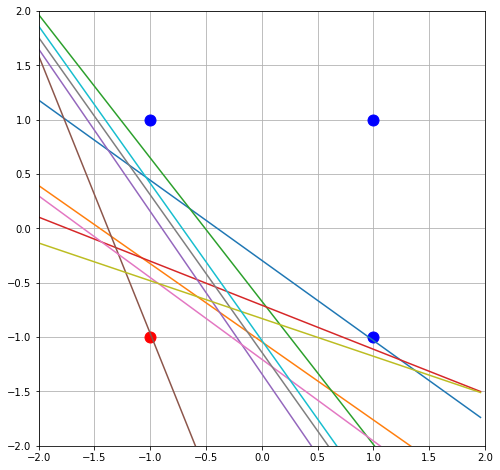

In [6]:
# Se generan 10 perceptrones (w), y recuperamos el último
w = graf_umbral(func_or_x,func_or_y)
print('X1 or X2 => Y')
for f in func_or_x:
    y = prediccion(f,w)
    print(f,y)

### XOR:

In [7]:
# Función XOR
func_or_x = np.asarray([[-1,-1],[-1,1],[1,-1],[1,1]] )
func_or_y = np.asarray([-1,1,1,-1])

X1 or X2 => Y
[-1 -1] -1.0
[-1  1] -1.0
[ 1 -1] -1.0
[1 1] 1.0


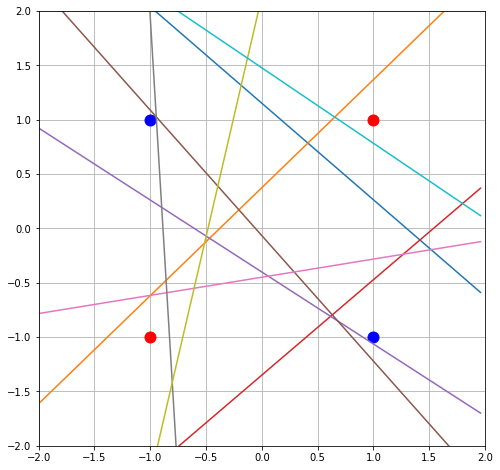

In [8]:
# Se generan 10 perceptrones (w), y recuperamos el último
w = graf_umbral(func_or_x,func_or_y)
print('X1 or X2 => Y')
for f in func_or_x:
    y = prediccion(f,w)
    print(f,y)

**XOR** no es separable linealmente, es decir, no existe una recta, que separe en dos categorías. El perceptron multicapa solucionó esta dificultad. Otra solución es el uso de Kernels que generen un mapeo a más dimensiones, mediante una función que permita tal separación. Para graficar, se puede imaginar que se agrega una dimensión más, $Z$, tal que $XOR \left(X1, X2 \right) = Z$, y así existe un hiperplano de separación ($Z=0$) 





# Perceptrón Multicapa - Backpropagation
## Teorema de aproximación universal.

1989 - George Cybenko para funciones de activación sigmoideas.
1991 - Kurt Hornik demuestra que basta la arquitectura feedforward.

Sea $\phi : \mathbb{R} \rightarrow \mathbb{R}$ una función no constante, acotada y continua, a la que se la denomina función de activación. Sea $U_m : [0,1]^m$ el hipercubo de dimensión m, y sea $C(U_m)$ el espacio de funciones reales continuas sobre $U_m$. 

Entonces, dado cualquier $\epsilon >0$ y cualquier función $f\in C(U_m)$, existe un entero $N$, constantes $\alpha_i, \beta_i \in \mathbb{R}$ y un vector $w_i \in \mathbb{R}^m$ para $i\in 1,...,N$, de manera tal que se define:

\begin{equation*}
F(x) = \sum_{i=1} ^{N} {\alpha_i \phi \left (  w_i ^T ~ x + \beta_i \right )}
\end{equation*}

como una aproximación de la función $f$, tal que $|F(x)-f(x)|<\epsilon$

 


### Problema de Regresión

En un problema de regresión no se tiene un conjunto de identificadores o labels, se tienen dos conjuntos ordenados, uno un muestra del dominio, y el otro, se lo considera la evaluación de las muestras en la función a modelar.
Se va a determinar un modelo de la función $y = sen(x)+N$. 

Se define el conjunto de entrenamiento $[X , y] : y = f(X)$.

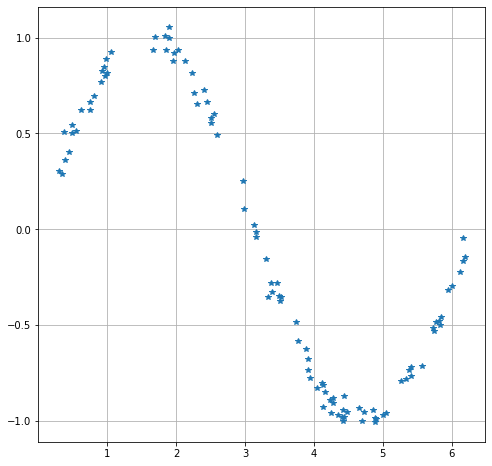

In [19]:
from sklearn.neural_network import MLPRegressor  # Perceptron multilayer

n_muestras = 100
ruido = 0.05
# selección aleatoria muestras del dominio [0,2*pi]
X = np.random.rand(n_muestras,1)*2*np.pi
# salida esperada
y = np.add(np.sin(X),ruido*np.random.randn(X.shape[0],1)).reshape(-1)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
plt.plot(X,y,'*')
ax.grid()

Se define un Perceptron multicapa con un único layer intermedio compuesto por 10 neuronas. La función de activación es 

\begin{equation*}
tanh(x) = \frac {e^x - e^{-x}}{e^x + e^{-x}}
\end{equation*}

con método de optimización limited-memory Broyden–Fletcher–Goldfarb–Shanno (BFGS) y regularización.('adam' o gradiente estocástico es bueno para muchas muestras. No es el caso)


In [10]:
clf = MLPRegressor(hidden_layer_sizes=(10,1),
                   activation='tanh',
                   solver='lbfgs',
                   learning_rate='adaptive',
                   max_iter=1000,
                   learning_rate_init=0.01,
                   alpha=0.01)

Habiendo, scikit-learn, generado el modelo por nosotros, lo pedimos que lo entrene:

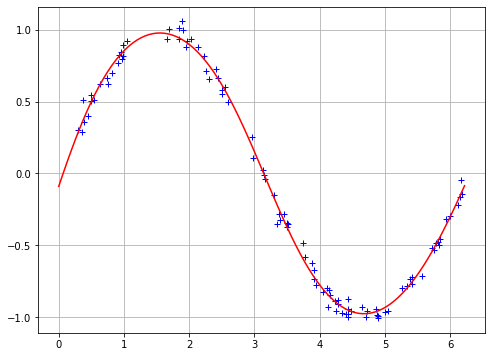

In [23]:
# entrenamiento
clf.fit(X, y)
# evaluación
Xtst = np.asarray(range(100))/100*2*np.pi
Xtst = Xtst.reshape(100,1)
y_out = clf.predict(Xtst)
fig = plt.figure(figsize=(8,6))
plt.plot(X,y,'b+')
plt.plot(Xtst,y_out,'r')
plt.grid()

### Quiz
- Se puede observar que el algoritmo no asegura la convergencia. Una solución es medir el error cuadrático medio (ECM) de la aproximación, y salvar el modelo con el menor *ECM*
- Otra variante es emplear 'relu' como función de activación, en lugar de 'tanh'. Esta función de activación, al no ser acotada, no satisface el Teorema de Aproximación Universal. Entonces no es posible obtener una aproximación con un sólo nivel *hidden_layer_sizes=(10,1)*. Una opción es incrementar la cantidad de niveles ocultos, por ejemplo, *hidden_layer_sizes=(26,2)* y generar modelos hasta obtener uno con un error aceptable.

# Deep Learning

Se plantea una red de aprendizaje profundo, compuesta por 6 niveles convolucionales. Como tal, no es una red con profundidad, si se compara con el estado del arte. La red fue entrenada con **CIFAR-10** obteniendo una exactitud de un 87,42%. Si bien se encuentra lejos del estado del arte, superior a 95% se exactitud, está muy por encima de los algoritmos clásicos de machine learning.

### Preliminares:

In [24]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torchsummary import summary
# Detección de cuda device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Dispositivo: ',device)

Dispositivo:  cpu


In [25]:
# Hiperparámetros
num_classes = 10
batch_size = 16

### Red de aprendizaje profundo.

Se define la siguinete red:

<img src="imgs/6layers.png" alt="Drawing" style="width: 1200px;">

compuesta por 6 layers de neruonas convolucionales. Se emplean, además, niveles de normaliación (*BatchNormalization*) los cuales aportan a la regularización, y compensando un efecto llamado "deriva de la covarianza". También se emplean niveles *Dropout* los cuales permiten que la información fluya por toda la red, ayudando a evitar convergencias en mínimos locales.

In [26]:
#Definicmos la Red convolucional.

class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
                nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),  #hxwxc dimensiones 32x32x32
                nn.ReLU(),
                nn.BatchNorm2d(32))
        self.layer2 = nn.Sequential(
                nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(32),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Dropout(p=0.2))       
        self.layer3 = nn.Sequential(
                nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(64))
        self.layer4 = nn.Sequential(
                nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(64),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Dropout(p=0.3))
        self.layer5 = nn.Sequential(
                nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(128))
        self.layer6 = nn.Sequential(
                nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(128),
                nn.MaxPool2d(kernel_size=2, stride=2),
                nn.Dropout(p=0.4))
        self.fc3 = nn.Linear(4*4*128, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc1 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc3(out)
        out = self.fc2(out)
        out = self.fc1(out)
        return out



Se genera el modelo y se cargan los Kernels (pesos). Queda definido el estimador.

In [27]:
# Cargamos el modelo
model = ConvNet(num_classes)
model.load_state_dict(torch.load('model.ckpt',map_location=device))   
model = model.to(device)
summary(model,input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]           9,248
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
         MaxPool2d-7           [-1, 32, 16, 16]               0
           Dropout-8           [-1, 32, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          18,496
             ReLU-10           [-1, 64, 16, 16]               0
      BatchNorm2d-11           [-1, 64, 16, 16]             128
           Conv2d-12           [-1, 64, 16, 16]          36,928
             ReLU-13           [-1, 64, 16, 16]               0
      BatchNorm2d-14           [-1, 64,

## CIFAR - 10

La red fue diseñada para trabajar con imágenes de 32x32 péxeles. El dataset CIFAR-10 consiste de 60000 imágenes de 32x32 identificadas en 10 clases, con 6000 imágenes por clases. Es adecuado para el estimador.

<img src="imgs/cifar10.png" alt="Drawing" style="width: 600px;">

[https://www.cs.toronto.edu/~kriz/cifar.html](https://www.cs.toronto.edu/~kriz/cifar.html)

In [28]:
# Se define una transformación que normaliza las imagenes.
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#carga de CIFAR10
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# DataLoader es una herramienta interesante de pytorch para gestión de datos 
# para entrenamiento.
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
# se define un iterador sobre testloader
dataiter = iter(testloader)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print('Clases:')
for j in range(10):
    print(j,': ', classes[j])
    
def imshow(img):
# paravisualizar un batch de imágenes.
    img = img / 2 + 0.5     # para visualizar quitamos la normalización 
    npimg = img.numpy()     # se pasa de tensor a vector numpy
    fig = plt.figure(figsize=(24,8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Files already downloaded and verified
Clases:
0 :  plane
1 :  car
2 :  bird
3 :  cat
4 :  deer
5 :  dog
6 :  frog
7 :  horse
8 :  ship
9 :  truck


Se cargan algunas imágenes para ser categorizadas mediante la red

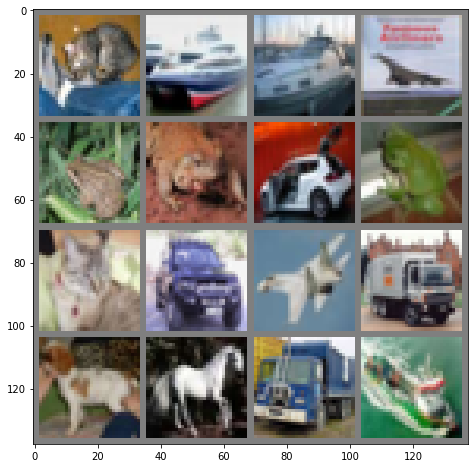

In [29]:
#  imágenes aleatorias
images, labels = dataiter.next()

# visualizamos
imshow(torchvision.utils.make_grid(images,nrow=4))

### Predicción sobre las imágenes.

La red predice a qué categoría pertenecen las imágenes anteriores.

In [30]:
images = images.to(device)
outputs = model(images)
_, predicted = torch.max(outputs.data, 1)
print('Imágen real: ',' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print('Predicción:  ',' '.join('%5s' % classes[predicted[j]] for j in range(batch_size)))

Imágen real:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship
Predicción:     cat  ship  ship plane  frog   dog   car  bird   cat   car plane truck   dog horse truck  ship


Se puede apreciar que la red se equivoca en categorizar las imágenes, no obstante esa equivocación no es consistente. 